# Working with coadd, multiband and forced photometry

### In this notebook we are going to show how to use the catalogs produced by forced photometry at the coadd level

## Coadd

Coadd images are the result of the addition of several images projected into a segmented sky map. 

The sky is divided in tract and patches according to a tessellation model. The size of the individual patches, the pixel size and the sky projection are parameters passed to makeSkyMap.py or makeDiscreteSkyMap.py

- makeDiscreteSkymap creates a sky map region containing all the calibrated exposures created by processCcd.py

Coaddition requires 2 steps:
- makeCoaddTempExp.py takes every calexp and project it (taking distorsions into account) into sky patches
- assembleCoadd.py collects all the segmented and warped calexp and add them into a single image (1 image per patch)

The simultaneous astrometry / photometry calibration (jointcal) can optionnaly be run against the calexp. In this case a special file containing the updated WCS + zero point is created and will be taken into account during the coadd process.

```
cca001[0] cd /sps/lsst/dev/lsstprod/hsc/SXDS/output
cca001[0] ls
HSC-G  HSC-I  HSC-R  HSC-Y  HSC-Z  repositoryCfg.yaml  skyMap.pickle  skyMap.pickle_save  skyMap.pickle_save2
```



One directory and one assembled coadd per patch:
```
cca001[0] cd HSC-G/0/
cca001[0] ls
0,3       1,7        2,2        3,2        4,2        5,2        6,2        7,2        8,2       9,4
0,3.fits  1,7.fits   2,2.fits   3,2.fits   4,2.fits   5,2.fits   6,2.fits   7,2.fits   8,2.fits  9,4.fits
0,4       1,8        2,3        3,3        4,3        5,3        6,3        7,3        8,3       9,5
0,4.fits  1,8.fits   2,3.fits   3,3.fits   4,3.fits   5,3.fits   6,3.fits   7,3.fits   8,3.fits  9,5.fits
0,5       1,9        2,4        3,4        4,4        5,4        6,4        7,4        8,4       9,6
0,5.fits  1,9.fits   2,4.fits   3,4.fits   4,4.fits   5,4.fits   6,4.fits   7,4.fits   8,4.fits  9,6.fits
0,6       10,3       2,5        3,5        4,5        5,5        6,5        7,5        8,5       9,7
0,6.fits  10,3.fits  2,5.fits   3,5.fits   4,5.fits   5,5.fits   6,5.fits   7,5.fits   8,5.fits  9,7.fits
0,7       10,4       2,6        3,6        4,6        5,6        6,6        7,6        8,6       9,8
0,7.fits  10,4.fits  2,6.fits   3,6.fits   4,6.fits   5,6.fits   6,6.fits   7,6.fits   8,6.fits  9,8.fits
1,2       10,5       2,7        3,7        4,7        5,7        6,7        7,7        8,7       9,9
1,2.fits  10,5.fits  2,7.fits   3,7.fits   4,7.fits   5,7.fits   6,7.fits   7,7.fits   8,7.fits  9,9.fits
1,3       10,6       2,8        3,8        4,8        5,8        6,8        7,8        8,8
1,3.fits  10,6.fits  2,8.fits   3,8.fits   4,8.fits   5,8.fits   6,8.fits   7,8.fits   8,8.fits
1,4       10,7       2,9        3,9        4,9        5,9        6,9        7,9        8,9
1,4.fits  10,7.fits  2,9.fits   3,9.fits   4,9.fits   5,9.fits   6,9.fits   7,9.fits   8,9.fits
1,5       10,8       3,1        4,1        5,1        6,1        7,1        8,1        9,2
1,5.fits  10,8.fits  3,1.fits   4,1.fits   5,1.fits   6,1.fits   7,1.fits   8,1.fits   9,2.fits
1,6       2,1        3,10       4,10       5,10       6,10       7,10       8,10       9,3
1,6.fits  2,1.fits   3,10.fits  4,10.fits  5,10.fits  6,10.fits  7,10.fits  8,10.fits  9,3.fits
```

Each directory contains the collection of warped image segment contributing to a given patch:
```
cca001[0] cd 6,7
cca001[0] ls
warp-HSC-G-0-6,7-11626.fits  warp-HSC-G-0-6,7-11662.fits  warp-HSC-G-0-6,7-42354.fits  warp-HSC-G-0-6,7-9836.fits
warp-HSC-G-0-6,7-11628.fits  warp-HSC-G-0-6,7-42346.fits  warp-HSC-G-0-6,7-42356.fits  warp-HSC-G-0-6,7-9874.fits
warp-HSC-G-0-6,7-11642.fits  warp-HSC-G-0-6,7-42348.fits  warp-HSC-G-0-6,7-9830.fits   warp-HSC-G-0-6,7-9878.fits
warp-HSC-G-0-6,7-11644.fits  warp-HSC-G-0-6,7-42350.fits  warp-HSC-G-0-6,7-9832.fits
warp-HSC-G-0-6,7-11660.fits  warp-HSC-G-0-6,7-42352.fits  warp-HSC-G-0-6,7-9834.fits
```

## multiband / cModel

Each coadd sources is identified / deblended / measured using CModel and multiband
- detectCoaddSources.py
- mergeCoaddDetections.py
- measureCoaddSources.py
- mergeCoaddMeasurements.py

The multiband processing guarantees that if 1 source is identified and measured in 1 band, there is also corresponding sources in the other bands (Warning: this is not a multi fit).

CModel fits an exponential and a de Vaucouleur separately, then fit a linear combination of the two while
holding the ellipse parameters fixed at the best fit values from an independent fitting.

CModel is also working on stars and ~corresponds to the PSF photometry (this property is used to separate stars and galaxies)

### Forced photometry

In forced photometry the source detection and galaxy shape measurement is performed in a reference band (i) and the photometry is measured in the other bands assuming that the same galaxy shape (even if it is not detected) 

forced photometry is run at the coadd level or at the calexp level using coadd detection

```
cca001[0] cd /sps/lsst/dev/lsstprod/hsc/SXDS/output
cca001[0] ls
00991  01052  01059  01318  01382      deepCoadd-results                   deep_makeCoaddTempExp_metadata  schema
00995  01055  01062  01327  config     deepCoadd_forcedPhotCoadd_metadata  jointcal-results
01004  01057  01316  01378  deepCoadd  deep_assembleCoadd_metadata         repositoryCfg.yaml
```

```
cca001[130] cd deepCoadd-results/
cca001[0] ls
HSC-G  HSC-I  HSC-R  HSC-Y  HSC-Z  merged
```

```
cca001[0] cd HSC-I/0/3,4/
cca001[0] ls
calexp-HSC-I-0-3,4.fits    detectMD-HSC-I-0-3,4.boost   measMD-HSC-I-0-3,4.boost
det-HSC-I-0-3,4.fits       forced_src-HSC-I-0-3,4.fits  srcMatch-HSC-I-0-3,4.fits
det_bkgd-HSC-I-0-3,4.fits  meas-HSC-I-0-3,4.fits        srcMatchFull-HSC-I-0-3,4.fits
```

- `0` is the tract number (only one in this case)
- `3,4` is the patch number
- there is one separate directory per patch
- `forced_src-HSC-I-0-3,4.fits` contains the forcedPhotCoadd catalog for the 'HSC-I' filter in patch '3,4'



# Usage example

We are going to use the forced photometry (at the coadd level) to create color diagrams

In [3]:
import lsst.daf.persistence as dafPersist

# Initialize butler
butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SXDS/output")

# for the dataid we need to specify the tract, the patch and the filter
# let's get 3 the data from 3 filters
dataid_r = {'tract':0, 'filter':'HSC-R', 'patch':'3,4'}
forced_r = butler.get('deepCoadd_forced_src', dataId=dataid_r, immedate=True)

dataid_i = {'tract':0, 'filter':'HSC-I', 'patch':'3,4'}
forced_i = butler.get('deepCoadd_forced_src', dataId=dataid_r, immedate=True)

dataid_g = {'tract':0, 'filter':'HSC-G', 'patch':'3,4'}
forced_g = butler.get('deepCoadd_forced_src', dataId=dataid_r, immedate=True)

25642 25642 25642


In [19]:
# The catalogs corresponding to the 3 filters have all the same length
# this is by definition of the forced photometry
print(len(forced_r), len(forced_i), len(forced_g))

25642 25642 25642


In [ ]:
# The catalog's objects are also stored in the same order
print(forced_r[235].get('id'), forced_i[235].get('id'), forced_g[235].get('id'))
print(forced_r[235].get('coord_ra'), forced_i[235].get('coord_ra'), forced_g[235].get('coord_ra'))
print(forced_r[235].get('coord_dec'), forced_i[235].get('coord_dec'), forced_g[235].get('coord_dec'))

In [6]:
# We need the calibration objects in order to convert flux to magnitude
# We use comprehension dictionaries 

filters = ['HSC-R', 'HSC-I', 'HSC-G']
dataid = {k: {'tract':0, 'filter':k, 'patch':'3,4'} for k in filters}
print(dataid)
calib = {k: butler.get('deepCoadd_calexp', dataId=dataid[k], immediate=True).getCalib() for k in filters}

{'HSC-R': {'tract': 0, 'filter': 'HSC-R', 'patch': '3,4'}, 'HSC-I': {'tract': 0, 'filter': 'HSC-I', 'patch': '3,4'}, 'HSC-G': {'tract': 0, 'filter': 'HSC-G', 'patch': '3,4'}}


In [28]:
# let's do the same for the forced catalog (we could have used the forced_r, forced_i and forced_g catalogs
# created as the previous step, but we want to be more pythonic)
#
# we also convert immediately to astropy tables
forced = {k: butler.get('deepCoadd_forced_src', dataId=dataid[k], immediate=True).asAstropy() for k in filters}
len(forced['HSC-G'])

25642

In [30]:
import numpy as np

# Create a selection mask in order to only keep rows with valid flux measurements
# Initialize mask to True
sel = np.full(len(forced['HSC-G']), True, dtype=bool)

for f in filters:
    sel &= ((forced[f]['modelfit_CModel_flag'] == False) & (forced[f]['modelfit_CModel_flux'] > 0))
    sel &= (forced[f]['modelfit_CModel_flux']/forced[f]['modelfit_CModel_fluxSigma'] > 5)
    
m = {}
s = {}
for f in filters:
    m[f], s[f] = calib[f].getMagnitude(forced[f]['modelfit_CModel_flux'][sel], 
                                           forced[f]['modelfit_CModel_fluxSigma'][sel])

len(m['HSC-G'])

/sps/lsst/software/lsst_distrib/w_2017_38/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


17482

In [31]:
# keep only good rows and add 2 columns to store magnitudes and error on magnitudes
for f in filters:
    forced[f] = forced[f][sel]
    forced[f]['magnitude'] = m[f]
    forced[f]['magnitudeErr'] = s[f]

In [32]:
forced['HSC-G']['magnitude'][:5]
len(forced['HSC-G']['base_ClassificationExtendedness_flag'])

17482

In [33]:
# select stars
stars =  (forced['HSC-I']['base_ClassificationExtendedness_flag'] == False) 
stars &= (forced['HSC-I']['base_ClassificationExtendedness_value'] < 0.5)

# select galaxies
galaxies =  (forced['HSC-I']['base_ClassificationExtendedness_flag'] == False) 
galaxies &= (forced['HSC-I']['base_ClassificationExtendedness_value'] > 0.5)

print(len(stars), len(galaxies))

17482 17482


/sps/lsst/software/lsst_distrib/w_2017_38/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
/sps/lsst/software/lsst_distrib/w_2017_38/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


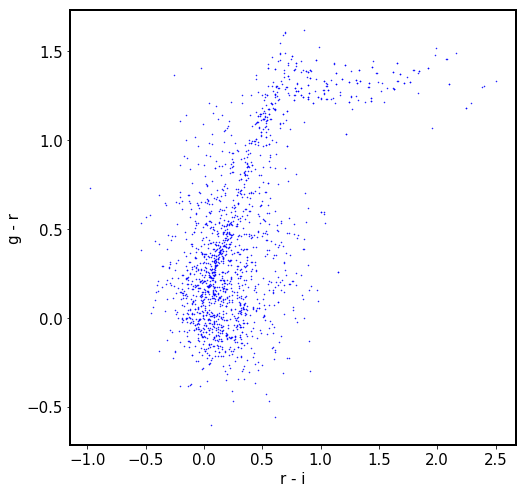

In [55]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'bold',
        'size'   : 25,
        }

plt.rcParams['axes.linewidth'] = 2 
plt.rcParams['mathtext.default'] = 'regular'

fig, (ax) = plt.subplots(ncols=1, figsize=(8,8))

ax.scatter(forced['HSC-R']['magnitude'][stars] - forced['HSC-I']['magnitude'][stars],
           forced['HSC-G']['magnitude'][stars] - forced['HSC-R']['magnitude'][stars], s=0.25, c='b')
ax.set_xlabel('r - i', fontsize=15)
ax.set_ylabel('g - r', fontsize=15)
ax.tick_params(labelsize=15)
#ax.scatter(forced['HSC-R']['magnitude'][galaxies] - forced['HSC-I']['magnitude'][galaxies],
#           forced['HSC-G']['magnitude'][galaxies] - forced['HSC-R']['magnitude'][galaxies], s=0.25, c='r')

In [48]:
# Cut on magnitude 
sel = (forced['HSC-I']['magnitude'] > 17 ) & (forced['HSC-I']['magnitude'] < 25)
np.sum(sel)

7652

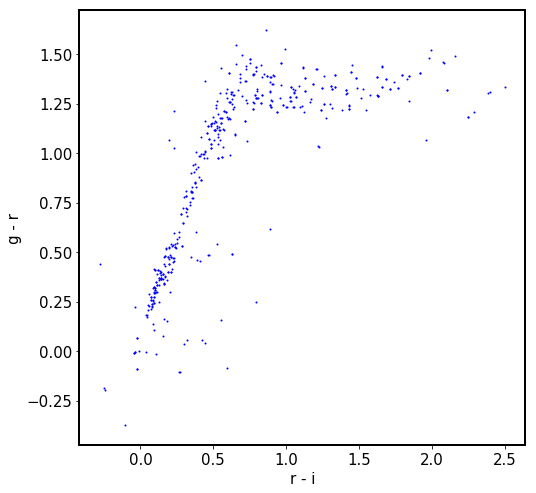

In [56]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,8))

ax.scatter(forced['HSC-R']['magnitude'][stars & sel] - forced['HSC-I']['magnitude'][stars & sel],
           forced['HSC-G']['magnitude'][stars & sel] - forced['HSC-R']['magnitude'][stars & sel], s=1, c='b')
ax.set_xlabel('r - i', fontsize=15)
ax.set_ylabel('g - r', fontsize=15)
ax.tick_params(labelsize=15)
#ax.scatter(forced['HSC-R']['magnitude'][galaxies & sel] - forced['HSC-I']['magnitude'][galaxies & sel],
#           forced['HSC-G']['magnitude'][galaxies & sel] - forced['HSC-R']['magnitude'][galaxies & sel], s=0.25, c='r')

In [57]:
schema = forced_i.getSchema()
schema.getOrderedNames()

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'deblend_nChild',
 'base_TransformedCentroid_x',
 'base_TransformedCentroid_y',
 'base_TransformedCentroid_flag',
 'base_TransformedShape_xx',
 'base_TransformedShape_yy',
 'base_TransformedShape_xy',
 'base_TransformedShape_flag',
 'modelfit_DoubleShapeletPsfApprox_0_xx',
 'modelfit_DoubleShapeletPsfApprox_0_yy',
 'modelfit_DoubleShapeletPsfApprox_0_xy',
 'modelfit_DoubleShapeletPsfApprox_0_x',
 'modelfit_DoubleShapeletPsfApprox_0_y',
 'modelfit_DoubleShapeletPsfApprox_0_0',
 'modelfit_DoubleShapeletPsfApprox_0_1',
 'modelfit_DoubleShapeletPsfApprox_0_2',
 'modelfit_DoubleShapeletPsfApprox_0_3',
 'modelfit_DoubleShapeletPsfApprox_0_4',
 'modelfit_DoubleShapeletPsfApprox_0_5',
 'modelfit_DoubleShapeletPsfApprox_1_xx',
 'modelfit_DoubleShapeletPsfApprox_1_yy',
 'modelfit_DoubleShapeletPsfApprox_1_xy',
 'modelfit_DoubleShapeletPsfApprox_1_x',
 'modelfit_DoubleShapeletPsfApprox_1_y',
 'modelfit_DoubleShapeletPsfApprox_1_0',
 'modelfit_DoubleSh